In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

import os
import glob

In [52]:
folders = [f for f in os.listdir() if "vs" in f]
folders_dict = {}
for f in folders:
    f_arr = f.split("_")
    key = f_arr[0]+f_arr[2][0]
    if("Chrono" in f): key = key + f_arr[-1][0]
    folders_dict[key] = f
folders,folders_dict

(['X_vs_None_Flare',
  'M_vs_None_Flare',
  'M_vs_None_Flare_Chronological',
  'X_vs_None_Flare_Chronological',
  'M_vs_X',
  'M_vs_X_Chronological'],
 {'XN': 'X_vs_None_Flare',
  'MN': 'M_vs_None_Flare',
  'MNC': 'M_vs_None_Flare_Chronological',
  'XNC': 'X_vs_None_Flare_Chronological',
  'MX': 'M_vs_X',
  'MXC': 'M_vs_X_Chronological'})

In [53]:
import glob

files_by_folders_dict = {}
for f in folders:
    files_by_folders_dict[f] = glob.glob(os.path.join(f,'*.txt'))
files_by_folders_dict

{'X_vs_None_Flare': ['X_vs_None_Flare\\CNN_T48_P1_x_vs_none_T48_P1_data_0.978.txt',
  'X_vs_None_Flare\\CNN_T48_P3_x_vs_none_T48_P3_data_0.977.txt',
  'X_vs_None_Flare\\CNN_T48_P6_x_vs_none_T48_P6_data_0.978.txt',
  'X_vs_None_Flare\\CNN_T48_P12_x_vs_none_T48_P12_data_0.972.txt',
  'X_vs_None_Flare\\CNN_T48_P24_x_vs_none_T48_P24_data_0.966.txt',
  'X_vs_None_Flare\\CNN_T48_P48_x_vs_none_T48_P48_data_0.966.txt',
  'X_vs_None_Flare\\CNN_T48_P72_x_vs_none_T48_P72_data_0.922.txt',
  'X_vs_None_Flare\\CNN_T48_P96_x_vs_none_T48_P96_data_0.794.txt'],
 'M_vs_None_Flare': ['M_vs_None_Flare\\CNN_T48_P1_m_vs_none_T48_P1_data_0.969.txt',
  'M_vs_None_Flare\\CNN_T48_P3_m_vs_none_T48_P3_data_0.966.txt',
  'M_vs_None_Flare\\CNN_T48_P6_m_vs_none_T48_P6_data_0.962.txt',
  'M_vs_None_Flare\\CNN_T48_P12_m_vs_none_T48_P12_data_0.943.txt',
  'M_vs_None_Flare\\CNN_T48_P24_m_vs_none_T48_P24_data_0.948.txt',
  'M_vs_None_Flare\\CNN_T48_P48_m_vs_none_T48_P48_data_0.923.txt',
  'M_vs_None_Flare\\CNN_T48_P72_m_v

In [54]:
metrics_dict = {}

for key_fname,folder in folders_dict.items():
    
    fpaths = files_by_folders_dict[folder]
    
    folder_metrics_dict = {}
    
    for fpath in fpaths:
        pred_time_key = fpath.split(os.path.sep)[1].split('_')[2]
        file = open(fpath,'r')
        lines = file.readlines();
        file_metrics_dict = {}
        for line in lines:
            if("=" in line):
                metric = line.split("=")
                key = metric[0]
                key = key.replace(' ','')
                val = metric[1]
                if('fpr' in key or 'tpr' in key):
#                     print(val[1:-4])
                    val = val[1:-4]
                    file_metrics_dict[key] = np.fromstring(val, dtype=float, sep=',')
                elif(not 'conf_matrix' in key):
                    val.replace(' ','')
                    file_metrics_dict[key] = float(val)
#         print(metrics_dict)
#         print(key_fname,pred_time_key)
        folder_metrics_dict[pred_time_key] = file_metrics_dict
    metrics_dict[key_fname] = folder_metrics_dict

for key in metrics_dict.keys():
    print(key,metrics_dict[key].keys())
    print("       ",metrics_dict[key]['P1'].keys())

XN dict_keys(['P1', 'P3', 'P6', 'P12', 'P24', 'P48', 'P72', 'P96'])
        dict_keys(['fpr', 'tpr', 'auc', 'accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS', 'TP', 'TN', 'FP', 'FN'])
MN dict_keys(['P1', 'P3', 'P6', 'P12', 'P24', 'P48', 'P72', 'P96'])
        dict_keys(['fpr', 'tpr', 'auc', 'accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS', 'TP', 'TN', 'FP', 'FN'])
MNC dict_keys(['P1', 'P3', 'P6', 'P12', 'P24', 'P48', 'P72', 'P96'])
        dict_keys(['fpr', 'tpr', 'auc', 'accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS', 'TP', 'TN', 'FP', 'FN'])
XNC dict_keys(['P1', 'P3', 'P6', 'P12', 'P24', 'P48', 'P72', 'P96'])
        dict_keys(['fpr', 'tpr', 'auc', 'accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS', 'TP', 'TN', 'FP', 'FN'])
MX dict_keys(['P1', 'P3', 'P6', 'P12', 'P24', 'P48', 'P72', 'P96'])
        dict_keys(['fpr', 'tpr', 'auc', 'accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS', 'TP', 'TN', '

In [55]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc,f1_score,precision_score,recall_score

# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, color=plot_colors[i],
#              lw=lw, label=str(pred_gaps[i])+
#                          'h prediction ahead, '+str(train_wind[i])
#                          +'h train window (area = %0.3f)' % roc_auc)

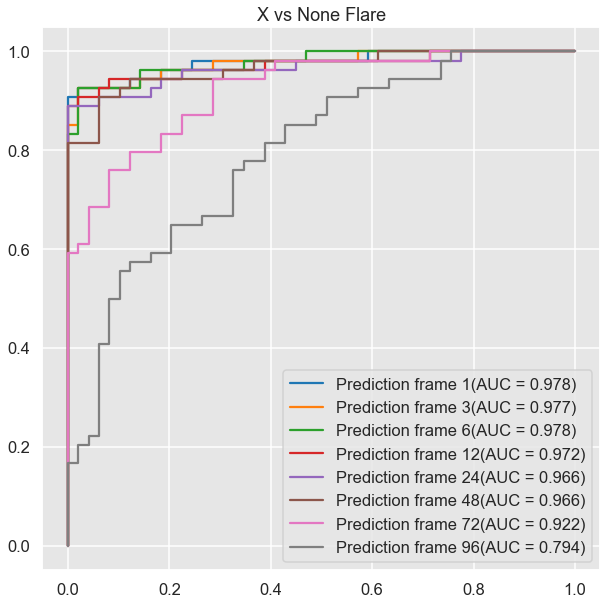

In [56]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
# sns.set_theme()


folder_short='XN'
title = folders_dict[folder_short]
title = title.replace('_',' ')
plt.title(title)
for key,val in metrics_dict[folder_short].items():
    
    fpr=val['fpr']
    tpr=val['tpr']
    
    label = 'Prediction frame {}(AUC = {:.3f})'.format(key[1:],auc(fpr,tpr))
    plt.plot(fpr,tpr,label=label)

plt.legend()
plt.show()

(1, 2)
(1, 2)


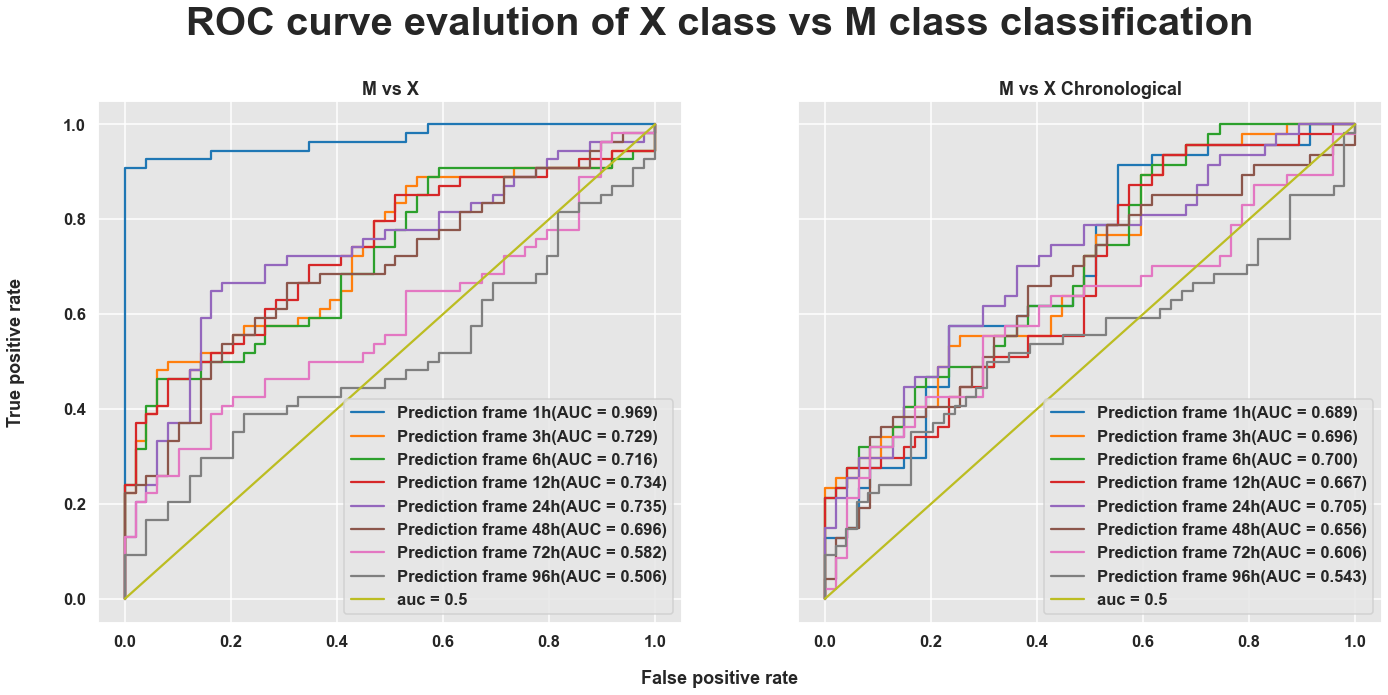

In [57]:
sns.set_context("talk")
# types = np.array([['XN','XNC'],['MN','MNC']])
types = np.array([['MX','MXC']])
print(types.shape)
fig,axs = plt.subplots(types.shape[0],types.shape[1],sharex=True, sharey=True)
fig.suptitle('ROC curve evalution of X class vs M class classification',fontweight='bold',fontsize=40)
plt.subplots_adjust(top=0.85)
axs = axs.reshape(-1,types.shape[1])
print(axs.shape)
fig.set_figheight(10)
fig.set_figwidth(23)

fig.text(0.5, 0.04, 'False positive rate', ha='center',fontweight='bold')
fig.text(0.07, 0.5, 'True positive rate', va='center', rotation='vertical',fontweight='bold')

for (i,j) in list(itertools.product(range(types.shape[0]),range(types.shape[1]))):
    type_key = types[i,j]
    ax = axs[i,j]
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontweight('bold')
    title = folders_dict[type_key]
    title = title.replace('_',' ')
    ax.set_title(title,fontweight='bold')
    for key,val in metrics_dict[type_key].items():

        fpr=val['fpr']
        tpr=val['tpr']

        label = 'Prediction frame {}h(AUC = {:.3f})'.format(key[1:],auc(fpr,tpr))
        ax.plot(fpr,tpr,label=label)
        
    ax.plot([0,1],[0,1],label='auc = 0.5')
    ax.legend(prop={'weight':'bold'})
    
plt.show()



(1, 2)


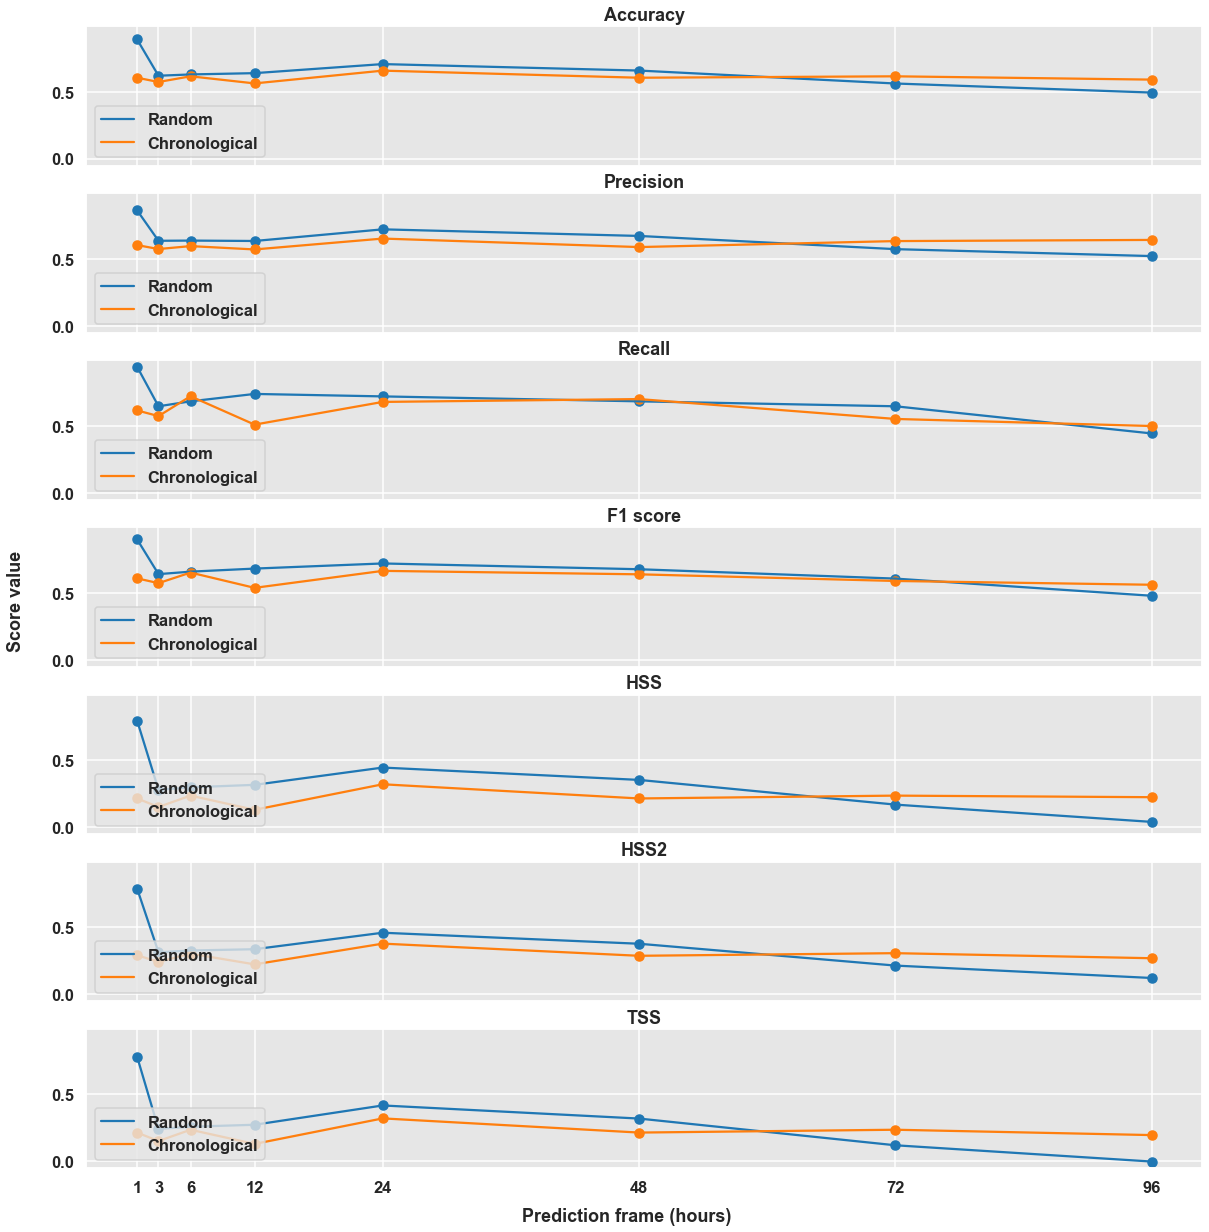

In [50]:
metrics_keys = ['accuracy', 'precision', 'recall', 'f1_score', 'HSS', 'HSS2', 'TSS']
metrics_names = [key.replace('_', " ").capitalize() for key in metrics_keys[:-3]]+metrics_keys[-3:]

# print(list(zip(metrics_keys,metrics_names)))

# types = np.array([['XN','XNC'],['MN','MNC']])
types = np.array([['MX','MXC']])
print(types.shape)
fig,axs = plt.subplots(len(metrics_names),types.shape[0],figsize=(20,21),sharex=True,sharey=True)
axs = axs.reshape(-1,types.shape[0])

# fig.suptitle('X class random/chronological split',fontweight='bold')

fig.text(0.5, 0.09, 'Prediction frame (hours)', ha='center',fontweight='bold')
fig.text(0.07, 0.5, 'Score value', va='center', rotation='vertical',fontweight='bold')

candles_dict = {}

for class_idx in range(types.shape[0]):
    a_dict = {};b_dict={}
    type_a_key = types[class_idx][0]
    type_b_key = types[class_idx][1]
    for idx,(m_key,m_name) in enumerate(list(zip(metrics_keys,metrics_names))):



        time_tick = [1,3,6,12,24,48,72,96]
        a_metric = []
        b_metric = []

        for time_frame_key in metrics_dict[type_a_key].keys():

    #         print(m_name,metrics_dict[type_a_key][time_frame_key][m_key],
    #               metrics_dict[type_b_key][time_frame_key][m_key])
            a = metrics_dict[type_a_key][time_frame_key][m_key]
            b = metrics_dict[type_b_key][time_frame_key][m_key]
            a_metric.append(a)
            b_metric.append(b)

    #     print(a_metric,b_metric,time_tick)
        a_metric = np.array(a_metric)
        b_metric = np.array(b_metric)
        
        a_dict[m_name] = a_metric
        b_dict[m_name] = b_metric
        
        
        
        
        ax = axs[idx][class_idx]
        ax.set_title(m_name,fontweight='bold')
        ax.set_xticks(time_tick)
#         ax.set_ylim(0.35,1.1)
        ax.plot(time_tick,a_metric,label = 'Random')
        ax.scatter(time_tick,a_metric)
        ax.plot(time_tick,b_metric,label = 'Chronological')
        ax.scatter(time_tick,b_metric)
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontweight('bold')
        ax.legend(prop={'weight':'bold'},loc=3)
    
    candles_dict[type_a_key] = a_dict
    candles_dict[type_b_key] = b_dict


{'Accuracy': array([0.94680851, 0.93617021, 0.90425532, 0.9787234 , 0.92553191,
        0.91489362, 0.85106383, 0.81914894]),
 'Precision': array([0.92      , 0.91836735, 0.91304348, 0.95918367, 0.93478261,
        0.93333333, 0.85106383, 0.89473684]),
 'Recall': array([0.9787234 , 0.95744681, 0.89361702, 1.        , 0.91489362,
        0.89361702, 0.85106383, 0.72340426]),
 'F1 score': array([0.94845361, 0.9375    , 0.90322581, 0.97916667, 0.92473118,
        0.91304348, 0.85106383, 0.8       ]),
 'HSS': array([0.89361702, 0.87234043, 0.80851064, 0.95744681, 0.85106383,
        0.82978723, 0.70212766, 0.63829787]),
 'HSS2': array([0.89452241, 0.8741512 , 0.81303757, 0.95744681, 0.85377999,
        0.83318244, 0.71321865, 0.6500679 ]),
 'TSS': array([0.89361702, 0.87234043, 0.80851064, 0.95744681, 0.85106383,
        0.82978723, 0.70212766, 0.63829787])}

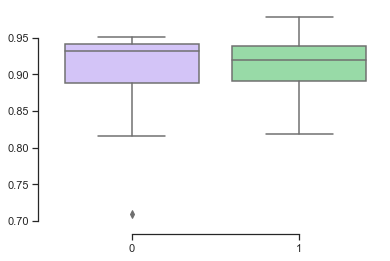

In [473]:
sns.set_theme(style="ticks", palette="pastel")

a = candles_dict['XN']['Accuracy']
b = candles_dict['XNC']['Accuracy']

sns.boxplot(data=[a,b],palette=["m", "g"])
sns.despine(offset=10, trim=True)
candles_dict['XNC']

56


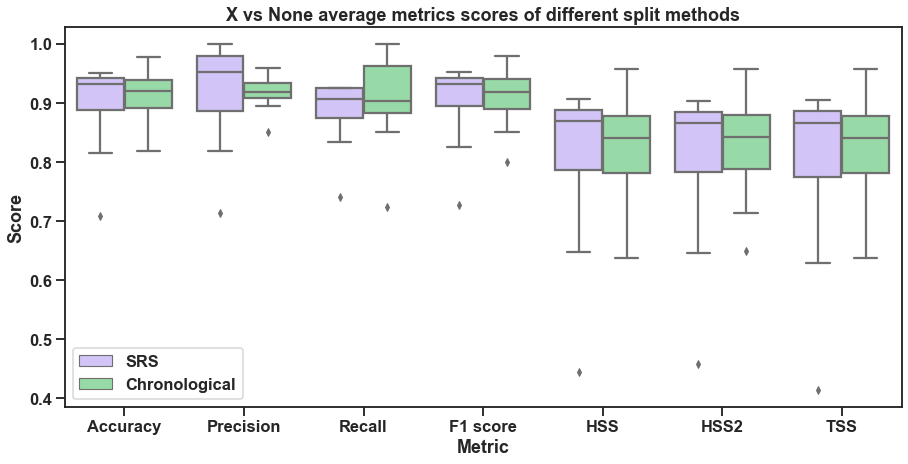

In [474]:
# a_dict = {'metric' : [metric for _ in candles_dict['XN'][metric] for metric in candles_dict['XN'].keys()]}
xn_dict = {'Metric' : [metric for metric in candles_dict['XN'].keys() for _ in candles_dict['XN'][metric]],
         'Method': ['SRS' for metric in candles_dict['XN'].keys() for _ in candles_dict['XN'][metric]],
         'Score' : [val for metric in candles_dict['XN'].keys() for val in candles_dict['XN'][metric]]}
xnc_dict = {'Metric' : [metric for metric in candles_dict['XNC'].keys() for _ in candles_dict['XNC'][metric]],
         'Method': ['Chronological' for metric in candles_dict['XNC'].keys() for _ in candles_dict['XNC'][metric]],
         'Score' : [val for metric in candles_dict['XNC'].keys() for val in candles_dict['XNC'][metric]]}

print(len(xn_dict['Score']))
df_XN =  pd.DataFrame(data=xn_dict)
df_XNC =  pd.DataFrame(data=xnc_dict)
df_X = pd.concat([df_XN,df_XNC],ignore_index=False)

sns.set_theme(style="ticks", palette="pastel")
sns.set_context("talk")

plt.figure(figsize=(15,7))

ax = sns.boxplot(x = 'Metric',y='Score',hue='Method',data=df_X,palette=["m", "g"])
# sns.despine(offset=10, trim=True)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontweight('bold')
ax.set_title('X vs None average metrics scores of different split methods',fontweight='bold')
ax.set_xlabel('Metric',fontweight='bold')
ax.set_ylabel('Score',fontweight='bold')
ax.legend(prop={'weight':'bold'},loc=3)

plt.show()


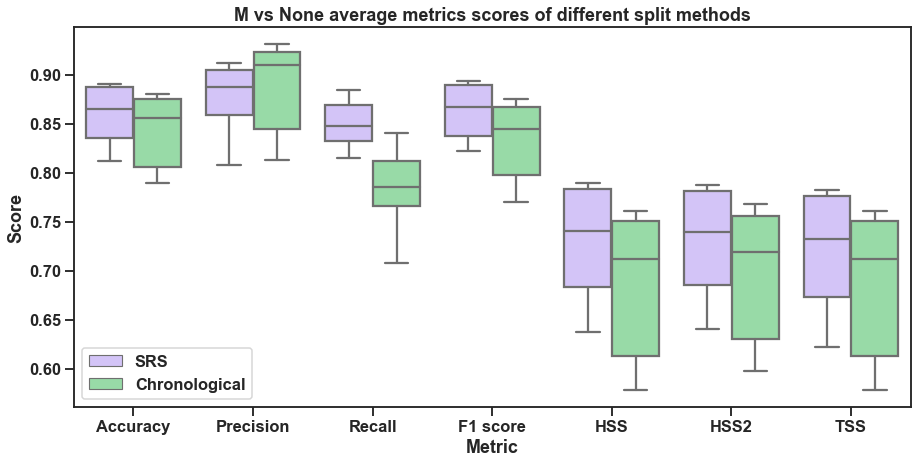

In [475]:
# a_dict = {'metric' : [metric for _ in candles_dict['XN'][metric] for metric in candles_dict['XN'].keys()]}
mn_dict = {'Metric' : [metric for metric in candles_dict['MN'].keys() for _ in candles_dict['MN'][metric]],
         'Method': ['SRS' for metric in candles_dict['MN'].keys() for _ in candles_dict['MN'][metric]],
         'Score' : [val for metric in candles_dict['MN'].keys() for val in candles_dict['MN'][metric]]}
mnc_dict = {'Metric' : [metric for metric in candles_dict['MNC'].keys() for _ in candles_dict['MNC'][metric]],
         'Method': ['Chronological' for metric in candles_dict['MNC'].keys() for _ in candles_dict['MNC'][metric]],
         'Score' : [val for metric in candles_dict['MNC'].keys() for val in candles_dict['MNC'][metric]]}


df_MN =  pd.DataFrame(data=mn_dict)
df_MNC =  pd.DataFrame(data=mnc_dict)
df_M = pd.concat([df_MN,df_MNC],ignore_index=False)

sns.set_theme(style="ticks", palette="pastel")
sns.set_context("talk")

plt.figure(figsize=(15,7))

ax = sns.boxplot(x = 'Metric',y='Score',hue='Method',data=df_M,palette=["m", "g"])
# sns.despine(offset=10, trim=True)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontweight('bold')
ax.set_title('M vs None average metrics scores of different split methods',fontweight='bold')
ax.set_xlabel('Metric',fontweight='bold')
ax.set_ylabel('Score',fontweight='bold')
ax.legend(prop={'weight':'bold'},loc=3)

plt.show()

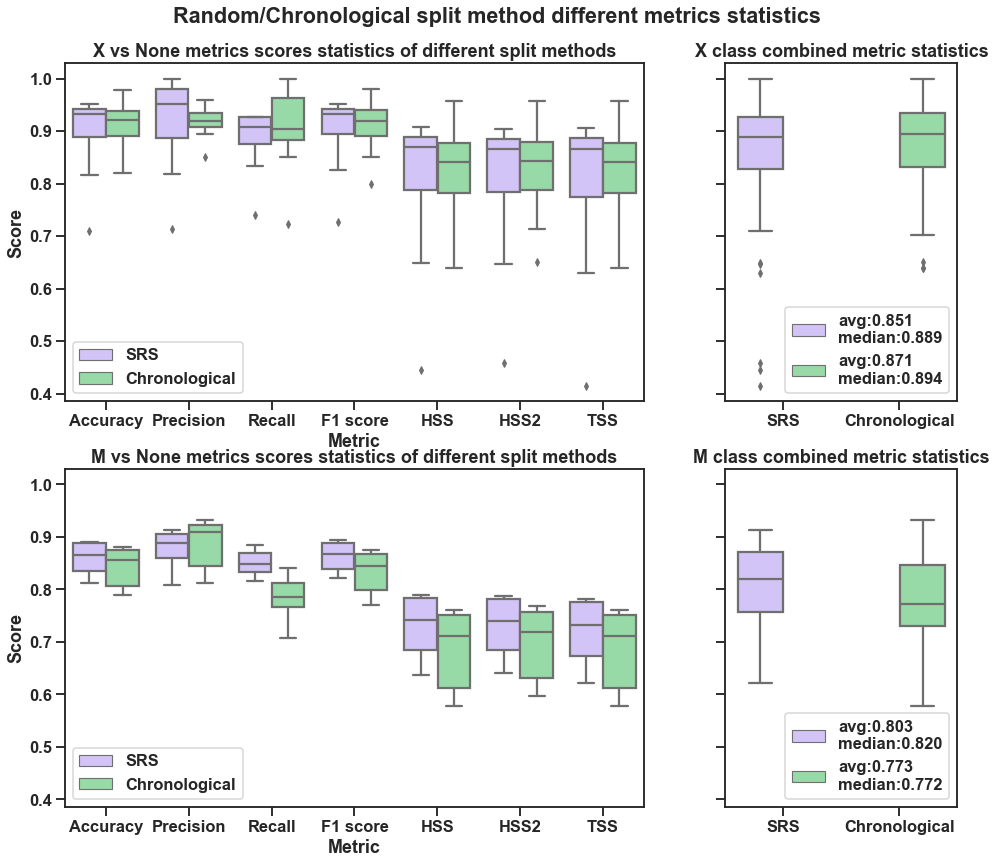

In [476]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_context("talk")


fig,axs = plt.subplots(2,2,figsize=(16,13),gridspec_kw={'width_ratios': [5, 2]},sharex=False,sharey=True)
fig.suptitle('Random/Chronological split method different metrics statistics',fontweight='bold')
plt.subplots_adjust(top=0.92)
dict_list = [xn_dict,xnc_dict,mn_dict,mnc_dict]
df_list = [df_X,df_M]
titels_l = ['X vs None metrics scores statistics of different split methods',
         'M vs None metrics scores statistics of different split methods']
titels_r = ['X class combined metric statistics',
         'M class combined metric statistics']
for idx in range(axs.shape[0]):
    df = df_list[idx]
    title_l = titels_l[idx]
    ax_l = axs[idx,0]
    ax_r = axs[idx,1]
    
    ax_l = sns.boxplot(x = 'Metric',y='Score',hue='Method',data=df,palette=["m", "g"],ax = ax_l)
    # sns.despine(offset=10, trim=True)
    for item in (ax_l.get_xticklabels() + ax_l.get_yticklabels())+(ax_r.get_xticklabels() + ax_r.get_yticklabels()):
        item.set_fontweight('bold')
    ax_l.set_title(title_l,fontweight='bold')
    ax_l.set_xlabel('Metric',fontweight='bold')
    ax_l.set_ylabel('Score',fontweight='bold')
    ax_l.legend(prop={'weight':'bold'},loc=3)
    
    
    score_srs = dict_list[2*idx]['Score']
    score_chrono = dict_list[2*idx+1]['Score']
    
    xlabels = ['SRS']*len(score_srs)+['Chronological']*len(score_chrono)
#     hue = [np.median(score_srs)]*len(score_chrono)+[np.median(score_chrono)]*len(score_chrono)
#     hue = ['median {:.3f}'.format(x) for x in hue]
    
    hue = [(np.mean(score_srs),np.median(score_srs))]*len(score_chrono)+[(np.mean(score_chrono),np.median(score_chrono))]*len(score_chrono)
    hue = ['avg:{:.3f}\nmedian:{:.3f}'.format(avg,med) for (avg,med) in hue]
    title_r = titels_r[idx]
    ax_r.set_title(title_r,fontweight='bold')
    ax_r = sns.boxplot(x = xlabels,y = score_srs+score_chrono,hue=hue ,palette=["m", "g"],ax = ax_r)
    ax_r.legend(loc=4,prop={'weight':'bold'})

    

plt.show()
    


Build Our dict

In [630]:
classes_list = ['XNC','MNC']
times = [1,3,6,12,24,48,72,96]
our_metrics_names = ['Accuracy','Precision','Recall','F1 score','HSS','HSS2','TSS']

our_dict = build_empty_dict(classes_list,our_metrics_names)


for c in classes_list:
    
    for m in our_metrics_names:
#         our_dict[c][m] = {'times':times,'values':candles_dict[c][m]}
        our_dict[c][m] = {'times':times,'values':[float('{:.3f}'.format(x)) for x in candles_dict[c][m]]}
        

# print(str(our_dict).replace(',','&'))
print('XNC')
for key,val in our_dict['XNC'].items():
    print(key,val['values'])
    
print('MNC')
for key,val in our_dict['MNC'].items():
    print(key,str([float('{:.3f}'.format(x)) for x in val['values']]).replace(',','&'))

XNC
Accuracy [0.947, 0.936, 0.904, 0.979, 0.926, 0.915, 0.851, 0.819]
Precision [0.92, 0.918, 0.913, 0.959, 0.935, 0.933, 0.851, 0.895]
Recall [0.979, 0.957, 0.894, 1.0, 0.915, 0.894, 0.851, 0.723]
F1 score [0.948, 0.938, 0.903, 0.979, 0.925, 0.913, 0.851, 0.8]
HSS [0.894, 0.872, 0.809, 0.957, 0.851, 0.83, 0.702, 0.638]
HSS2 [0.895, 0.874, 0.813, 0.957, 0.854, 0.833, 0.713, 0.65]
TSS [0.894, 0.872, 0.809, 0.957, 0.851, 0.83, 0.702, 0.638]
MNC
Accuracy [0.877& 0.881& 0.875& 0.865& 0.847& 0.81& 0.789& 0.795]
Precision [0.926& 0.914& 0.931& 0.922& 0.907& 0.842& 0.846& 0.813]
Recall [0.819& 0.841& 0.809& 0.797& 0.773& 0.763& 0.708& 0.767]
F1 score [0.869& 0.876& 0.866& 0.855& 0.835& 0.801& 0.771& 0.789]
HSS [0.753& 0.761& 0.75& 0.73& 0.694& 0.62& 0.579& 0.59]
HSS2 [0.759& 0.768& 0.755& 0.736& 0.703& 0.637& 0.597& 0.611]
TSS [0.753& 0.761& 0.75& 0.73& 0.694& 0.62& 0.579& 0.59]


In [527]:
def build_empty_dict(classes_list,metrics_list):
    d = {}
    for c in classes_list:
        mdict = {}
        for m in metrics_list:
            mdict[m] = {'times':[],'values':[]}
        d[c] = mdict

    return d

Build Park dict :#https://iopscience.iop.org/article/10.3847/1538-4357/aaed40/pdf

In [631]:
#https://iopscience.iop.org/article/10.3847/1538-4357/aaed40/pdf
classes_list = ['XNC','MNC']

park_dict = build_empty_dict(classes_list,metrics_names)
times = [24]
park_metrics_names = ['Accuracy','Recall','HSS2','TSS']
for c in classes_list:
    for n in park_metrics_names:
        park_dict[c][n]['times'] = times
        
    park_dict[c][park_metrics_names[0]]['values'] = [0.83]
    park_dict[c][park_metrics_names[1]]['values'] = [0.85]
    park_dict[c][park_metrics_names[2]]['values'] = [0.63]
    park_dict[c][park_metrics_names[3]]['values'] = [0.63]

park_dict

print('MNC')
for key,val in park_dict['MNC'].items():
    print(key,str([float('{:.3f}'.format(x)) for x in val['values']]).replace(',','&'))

MNC
Accuracy [0.83]
Precision []
Recall [0.85]
F1 score []
HSS []
HSS2 [0.63]
TSS [0.63]


Build Huang1 dict :#https://iopscience.iop.org/article/10.3847/1538-4357/aaae00/pdf

In [632]:
classes_list = ['XNC','MNC']

huang_dict = build_empty_dict(classes_list,metrics_names)
times = [6,12,24,48]
values = [[[0.006,0.014,0.025,0.042],[0.723,0.758,0.714,0.791]],
          [[0.054,0.081,0.143,0.206],[0.662,0.632,0.662,0.621]]]
huang_metrics_names = ['HSS2','TSS']

for idx,c in enumerate(classes_list):
    for n in huang_metrics_names:
        huang_dict[c][n]['times'] = times
    for idx2,v in enumerate(values[idx]): 
        huang_dict[c][huang_metrics_names[idx2]]['values'] = v



huang_dict
print('MNC')
for key,val in huang_dict['MNC'].items():
    print(key,str([float('{:.3f}'.format(x)) for x in val['values']]).replace(',','&'))

MNC
Accuracy []
Precision []
Recall []
F1 score []
HSS []
HSS2 [0.054& 0.081& 0.143& 0.206]
TSS [0.662& 0.632& 0.662& 0.621]


Build Chen(SHARP-LSTM) Table 6 dict :#https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2019SW002214 

In [633]:
classes_list = ['XNC','MNC']

chen_dict = build_empty_dict(classes_list,metrics_names)
times = [1,3,6,12,24,48,72]
values = [[[ 0.93 ,0.93, 0.91, 0.92 ,0.89, 0.88, 0.86],
           [ 0.88 ,0.87 ,0.85 ,0.85 ,0.77 ,0.72 ,0.68],
           [ 0.90 ,0.90, 0.88 ,0.88 ,0.83 ,0.79 ,0.76],
           [0.81 ,0.80 ,0.77 ,0.77 ,0.68, 0.62, 0.57],
           [0.81 ,0.79, 0.77 ,0.77 ,0.68 ,0.62 ,0.56],
           [0.81 ,0.80 ,0.77 ,0.77 ,0.68 ,0.62 ,0.56]],
          [[ 0.93 ,0.93, 0.91, 0.92 ,0.89, 0.88, 0.86],
           [ 0.88 ,0.87 ,0.85 ,0.85 ,0.77 ,0.72 ,0.68],
           [ 0.90 ,0.90, 0.88 ,0.88 ,0.83 ,0.79 ,0.76],
           [0.81 ,0.80 ,0.77 ,0.77 ,0.68, 0.62, 0.57],
           [0.81 ,0.79, 0.77 ,0.77 ,0.68 ,0.62 ,0.56],
           [0.81 ,0.80 ,0.77 ,0.77 ,0.68 ,0.62 ,0.56]]]
chen_metrics_names = ['Precision','Recall','F1 score','HSS','HSS2','TSS']

for idx,c in enumerate(classes_list):
    for n in chen_metrics_names:
        chen_dict[c][n]['times'] = times
    for idx2,v in enumerate(values[idx]): 
        chen_dict[c][chen_metrics_names[idx2]]['values'] = v



chen_dict
print('MNC')
for key,val in chen_dict['MNC'].items():
    print(key,str([float('{:.3f}'.format(x)) for x in val['values']]).replace(',','&'))

MNC
Accuracy []
Precision [0.93& 0.93& 0.91& 0.92& 0.89& 0.88& 0.86]
Recall [0.88& 0.87& 0.85& 0.85& 0.77& 0.72& 0.68]
F1 score [0.9& 0.9& 0.88& 0.88& 0.83& 0.79& 0.76]
HSS [0.81& 0.8& 0.77& 0.77& 0.68& 0.62& 0.57]
HSS2 [0.81& 0.79& 0.77& 0.77& 0.68& 0.62& 0.56]
TSS [0.81& 0.8& 0.77& 0.77& 0.68& 0.62& 0.56]


In [635]:
classes_list = ['XNC','MNC']

bobra_dict = build_empty_dict(classes_list,metrics_names)
times = [48,24]
values = [[[0.973,0.962],
           [0.797,0.69],
           [0.714,0.627],
           [0.751,0.656],
           [0.528,0.342],
           [0.737,0.636],
           [0.703,0.61]],
          [[0.973,0.962],
           [0.797,0.69],
           [0.714,0.627],
           [0.751,0.656],
           [0.528,0.342],
           [0.737,0.636],
           [0.703,0.61]]]
bobra_metrics_names = ['Accuracy','Precision','Recall','F1 score','HSS','HSS2','TSS']

for idx,c in enumerate(classes_list):
    for n in bobra_metrics_names:
        bobra_dict[c][n]['times'] = times
    for idx2,v in enumerate(values[idx]): 
        bobra_dict[c][bobra_metrics_names[idx2]]['values'] = v



bobra_dict
print('MNC')
for key,val in bobra_dict['MNC'].items():
    print(str([float('{:.3f}'.format(x)) for x in val['values']]).replace(',','&'),key)

MNC
[0.973& 0.962] Accuracy
[0.797& 0.69] Precision
[0.714& 0.627] Recall
[0.751& 0.656] F1 score
[0.528& 0.342] HSS
[0.737& 0.636] HSS2
[0.703& 0.61] TSS


Plot previous works comparison

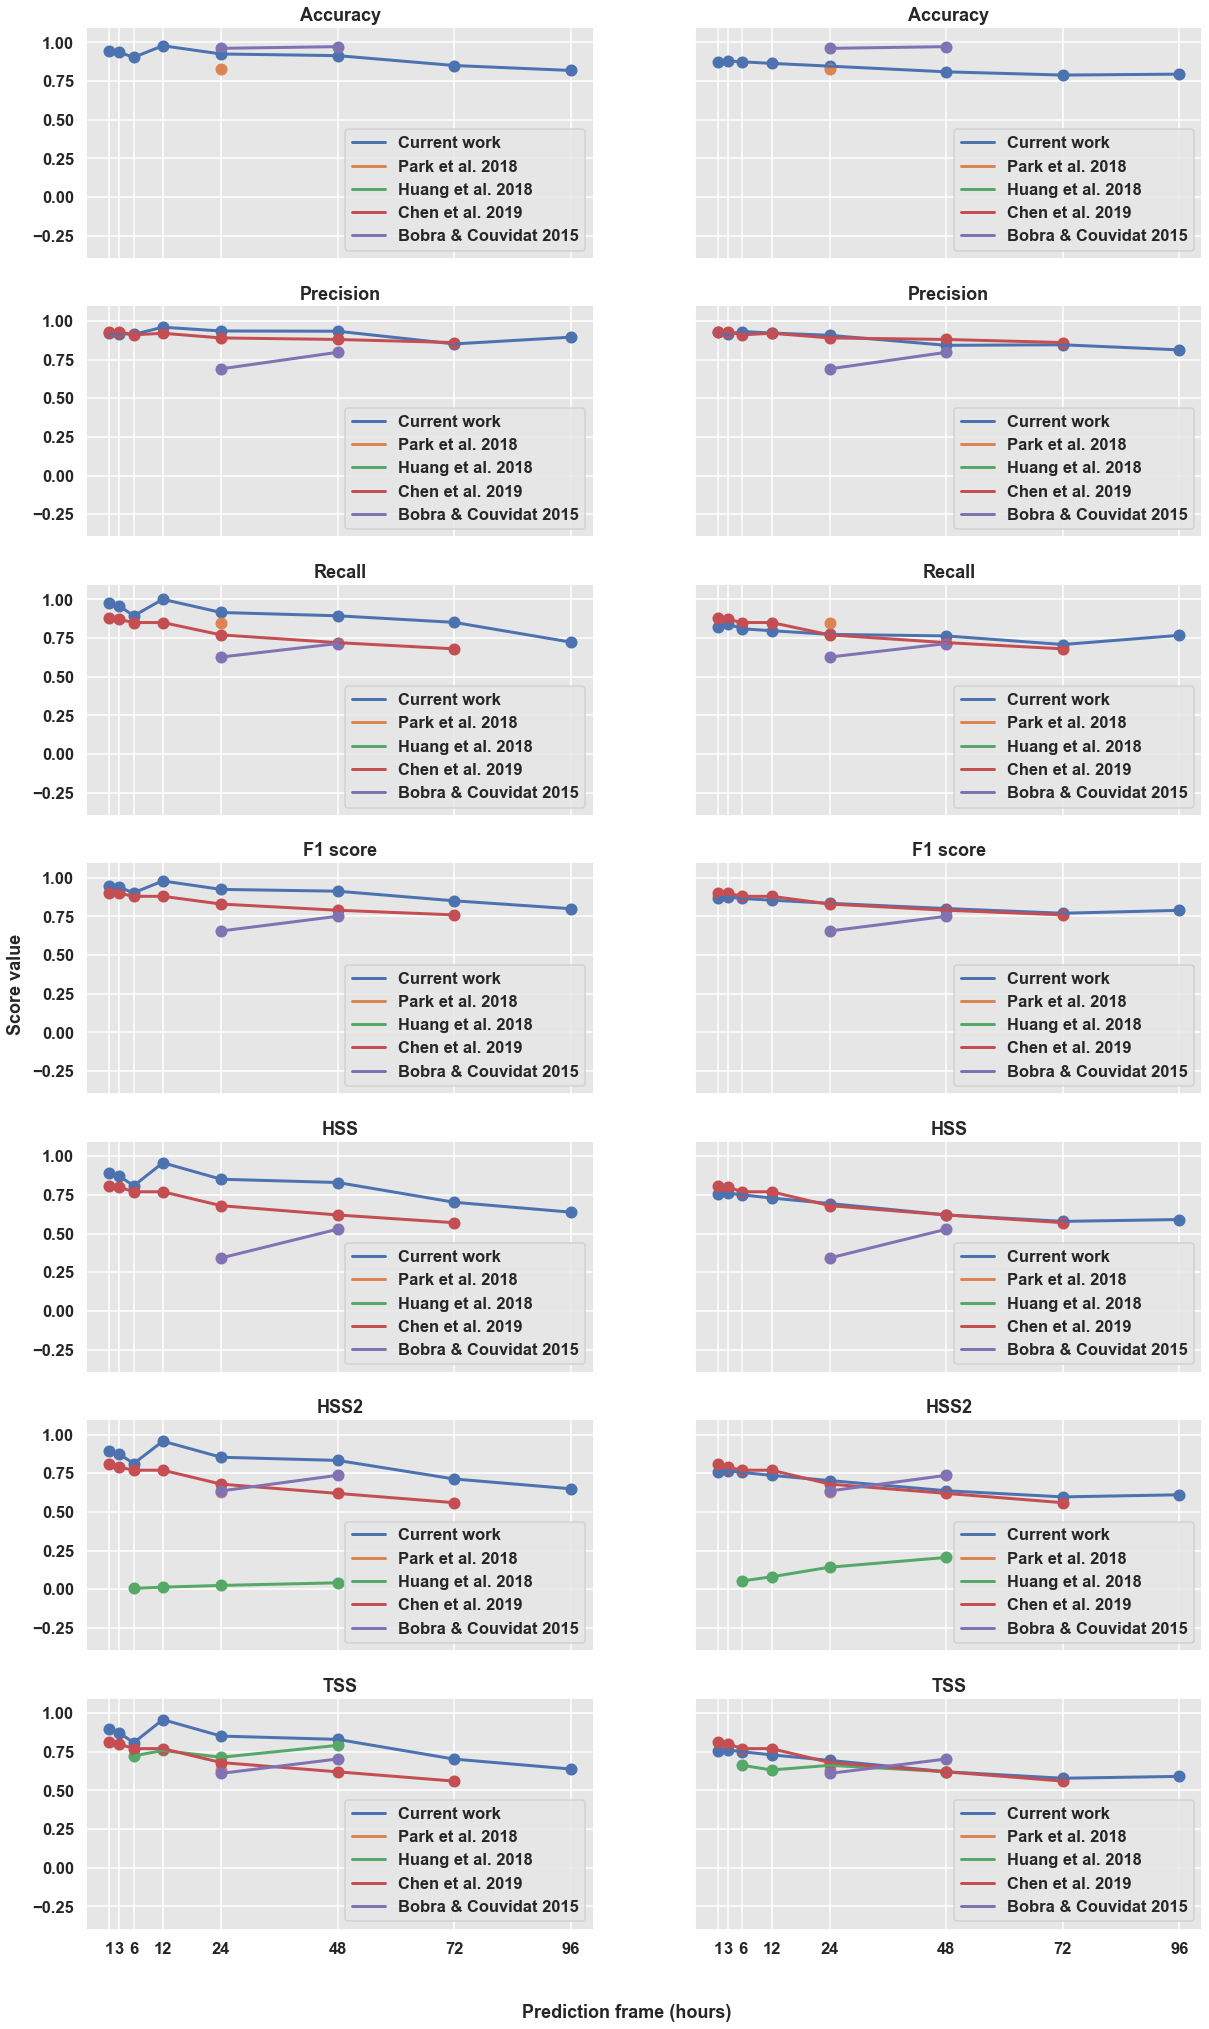

In [532]:
works_list = [our_dict,park_dict,huang_dict,chen_dict,bobra_dict]
works_names = ['Current work','Park et al. 2018','Huang et al. 2018','Chen et al. 2019','Bobra & Couvidat 2015']
colors = ['navy','brown','g','m']


fig,axs = plt.subplots(len(our_metrics_names),len(classes_list),figsize=(20,35),sharex=True,sharey=True)
axs = axs.reshape(-1,len(classes_list))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
# sns.set_theme()
# fig.suptitle('X class random/chronological split',fontweight='bold')
ticks_dict = {1:1,3:2,6:3,12:4,24:5,48:6,72:7,96:8}

fig.text(0.5, 0.09, 'Prediction frame (hours)', ha='center',fontweight='bold')
fig.text(0.07, 0.5, 'Score value', va='center', rotation='vertical',fontweight='bold')

for class_idx,class_name in enumerate(classes_list):
    
    for idx,m in enumerate(our_metrics_names):
        
        ax = axs[idx][class_idx]
        ax.set_title(m,fontweight='bold')
        for widx,d in enumerate(works_list):
            
            times = d[class_name][m]['times']
            values = d[class_name][m]['values']
            
#             times = [ticks_dict[t] for t in d[class_name][m]['times']]
#             ax.set_xticks([1,2,3,4,5,6,7,8])
#             ax.set_xticklabels([str(i) for i in [1,3,6,12,24,48,72,96]])

            ax.set_xticks([1,3,6,12,24,48,72,96])
            ax.set_ylim(-0.4,1.1)
            ax.plot(times,values,label = works_names[widx],linewidth=3)#,color=colors[widx])
            ax.scatter(times,values,linewidths=3)
            for item in (ax.get_xticklabels() + ax.get_yticklabels()):
                item.set_fontweight('bold')
            ax.legend(prop={'weight':'bold'},loc=4)
    

        


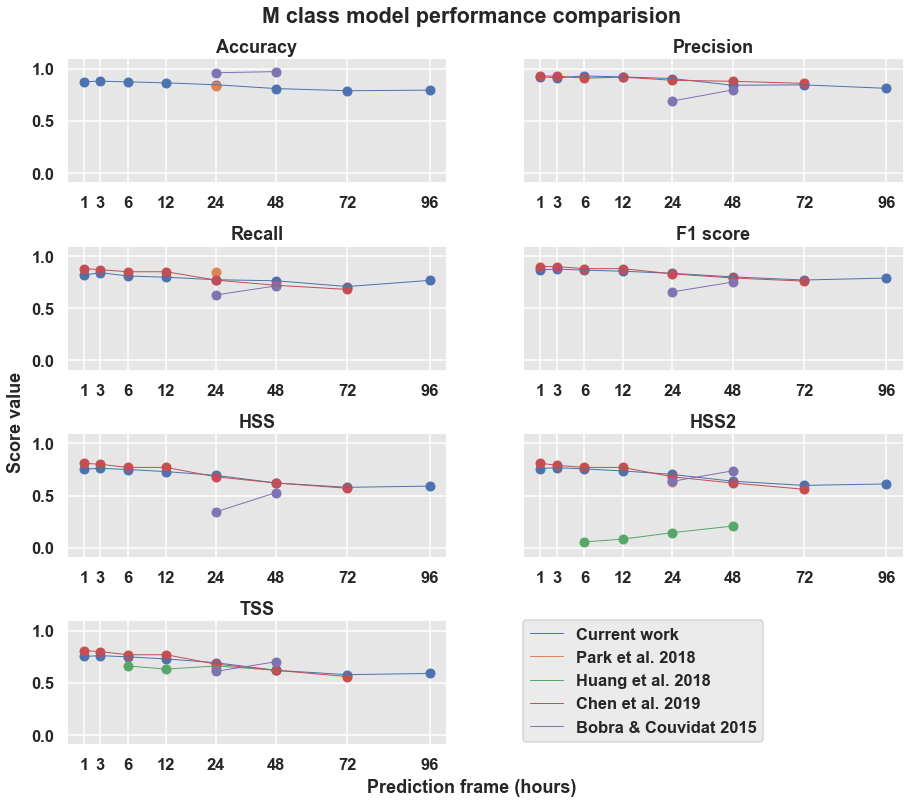

In [617]:
works_list = [our_dict,park_dict,huang_dict,chen_dict,bobra_dict]
works_names = ['Current work','Park et al. 2018','Huang et al. 2018','Chen et al. 2019','Bobra & Couvidat 2015']
colors = ['navy','brown','g','m']

classes_list = ['MNC']

fig,axs = plt.subplots(4,2,figsize=(15,12),sharex=False,sharey=True)
fig.suptitle('M class model performance comparision',fontweight='bold')
fig.subplots_adjust(top=0.92,hspace=.5)
axs = axs.reshape(-1,len(classes_list))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
# sns.set_theme()
# fig.suptitle('X class random/chronological split',fontweight='bold')
ticks_dict = {1:1,3:4,6:9,12:16,24:25,48:36,72:49,96:64}

fig.text(0.5, 0.07, 'Prediction frame (hours)', ha='center',fontweight='bold')
fig.text(0.07, 0.5, 'Score value', va='center', rotation='vertical',fontweight='bold')

for class_idx,class_name in enumerate(classes_list):
    
    for idx,m in enumerate(our_metrics_names):
        
        ax = axs[idx][class_idx]
        ax.set_title(m,fontweight='bold')
#         print(idx,axs.shape,ax)
        
        for widx,d in enumerate(works_list):
            
            times = d[class_name][m]['times']
            values = d[class_name][m]['values']
            
            times = [ticks_dict[t] for t in d[class_name][m]['times']]
            ax.set_xticks(np.power(np.array([1,2,3,4,5,6,7,8]),2))
#             print(ax.get_xticks())
            ax.set_xticklabels([str(i) for i in [1,3,6,12,24,48,72,96]])

#             ax.set_xticks([1,3,6,12,24,48,72,96])
#             ax.set_xticklabels([str(i)+"," for i in [1,3,6,12,24,48,72,96]])
            ax.set_ylim(-0.1,1.1)
            ax.plot(times,values,label = works_names[widx],linewidth=1)#,color=colors[widx])
            ax.scatter(times,values,linewidths=1)
            for item in (ax.get_xticklabels() + ax.get_yticklabels()):
                item.set_fontweight('bold')
                
            if(idx == len(our_metrics_names)-1):
#                 ax.legend(prop={'weight':'bold'},loc=4)
                ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left',
                          borderaxespad=0.,prop={'weight':'bold'})
    
    axs[len(our_metrics_names)][0].axis('off')